In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data

In [2]:
# Load the data
data = pd.read_csv('Air_Quality.csv')

# Display the first few rows of the data
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN


## Project goals


The goal of this project is to analyze the air quality trends in New York city over a period of time, with a specific focus on different pollutannts and their location distribution across the five boroughs and different neighborhoods. 

Investigations worth pursuing:
1. How has the overall air quality in New York City changed over time? Are there observable trends in the levels of specific pollutants?

2. Are there significant differences in air quality indicators between different boroughs or neighborhoods?

3. Are certain pollutants more prevalent in specific areas or during certain time periods?

4. Based on past data, can we predict future air quality levels for different areas?

# Data cleaning and preprocessing

In [3]:
# Display the size of the dataset
print("Size of the dataset:", data.shape)

# Display information about the dataset
data.info()

# Summarize the number of missing values in each column
data.isnull().sum()

Size of the dataset: (16122, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16122
dtype: int64

The dataset contains 16,122 rows and 12 columns. The column Message contains only missing values. We will drop this column since it does not provide any information. 

The Start_Date column is currently of object type, but for time series analysis, it would be more useful if it were in datetime format.

In [4]:
# Drop Message column
data = data.drop(columns=['Message']) 

# Convert Start_Date column to datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique ID       16122 non-null  int64         
 1   Indicator ID    16122 non-null  int64         
 2   Name            16122 non-null  object        
 3   Measure         16122 non-null  object        
 4   Measure Info    16122 non-null  object        
 5   Geo Type Name   16122 non-null  object        
 6   Geo Join ID     16122 non-null  int64         
 7   Geo Place Name  16122 non-null  object        
 8   Time Period     16122 non-null  object        
 9   Start_Date      16122 non-null  datetime64[ns]
 10  Data Value      16122 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.4+ MB


The dataset now has 11 columns (the Message column has been removed).

The Start_Date column has been converted to datetime format, which will be helpful for time series analysis.

# Exploratory data analysis

In [5]:
# Get basic statistics of the numerical columns
data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value
count,16122.000000,16122.000000,1.612200e+04,16122.000000
mean,339480.955589,427.131063,6.133394e+05,19.129163
std,194099.809551,109.657607,7.916715e+06,21.673789
min,130355.000000,365.000000,1.000000e+00,0.000000
25%,172183.250000,365.000000,2.020000e+02,8.460000
50%,221882.500000,375.000000,3.030000e+02,13.900000
75%,547749.750000,386.000000,4.040000e+02,25.470000
max,671122.000000,661.000000,1.051061e+08,424.700000


In [6]:
# Explore 'Name' column
print("Unique values in 'Name' column:")
print(data['Name'].value_counts())
print('\n')

# Explore 'Geo Type Name' column
print("Unique values in 'Geo Type Name' column:")
print(data['Geo Type Name'].value_counts())
print("\n")

# Explore 'Time Period' column
print("Unique values in 'Time Period' column:")
print(data['Time Period'].value_counts())

Unique values in 'Name' column:
Fine Particulate Matter (PM2.5)                                                 5076
Nitrogen Dioxide (NO2)                                                          5076
Ozone (O3)                                                                      1692
Sulfur Dioxide (SO2)                                                            1128
PM2.5-Attributable Asthma Emergency Department Visits                            384
O3-Attributable Asthma Emergency Department Visits                               384
O3-Attributable Asthma Hospitalizations                                          384
Traffic Density- Annual Vehicle Miles Traveled for Cars                          214
Traffic Density- Annual Vehicle Miles Traveled                                   209
Traffic Density- Annual Vehicle Miles Traveled for Trucks                        209
PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)     192
O3-Attributable Cardiac and Respi

## Air quality distribution

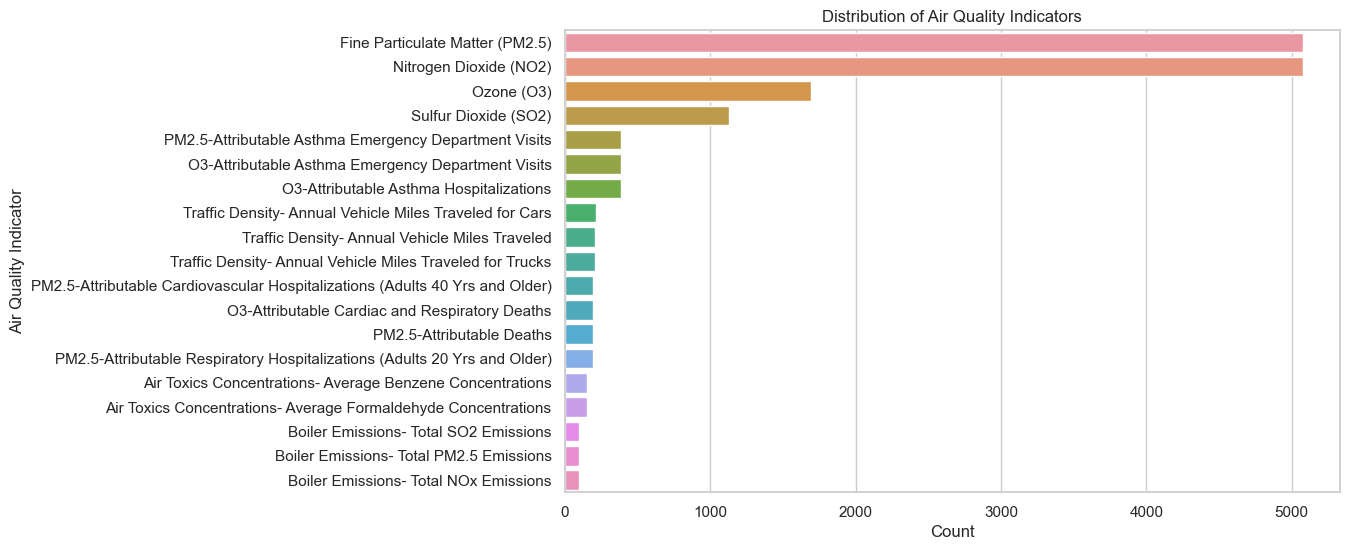

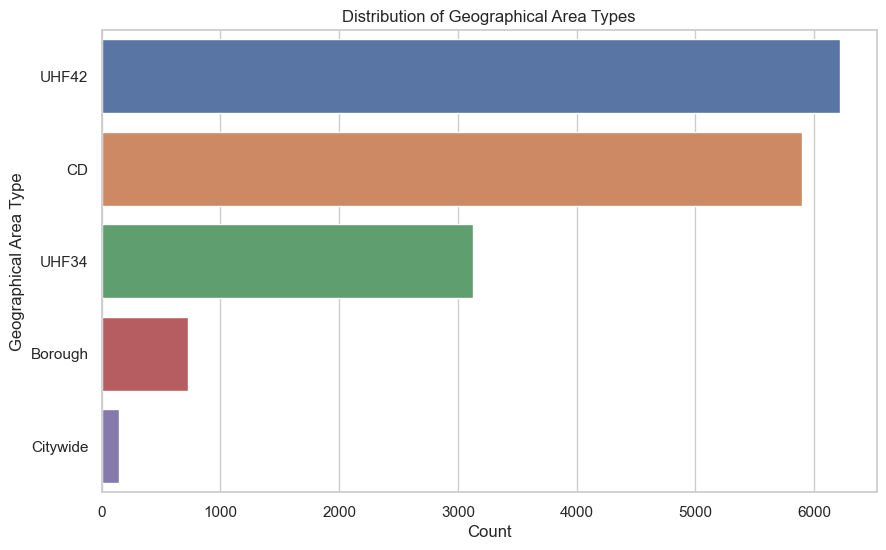

In [7]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plot the 'Name' column
plt.figure(figsize=(10, 6))
sns.countplot(y="Name", data=data, order = data['Name'].value_counts().index)
plt.title('Distribution of Air Quality Indicators')
plt.xlabel('Count')
plt.ylabel('Air Quality Indicator')
plt.show()

# Plot the 'Geo Type Name' column
plt.figure(figsize=(10, 6))
sns.countplot(y="Geo Type Name", data=data, order = data['Geo Type Name'].value_counts().index)
plt.title('Distribution of Geographical Area Types')
plt.xlabel('Count')
plt.ylabel('Geographical Area Type')
plt.show()


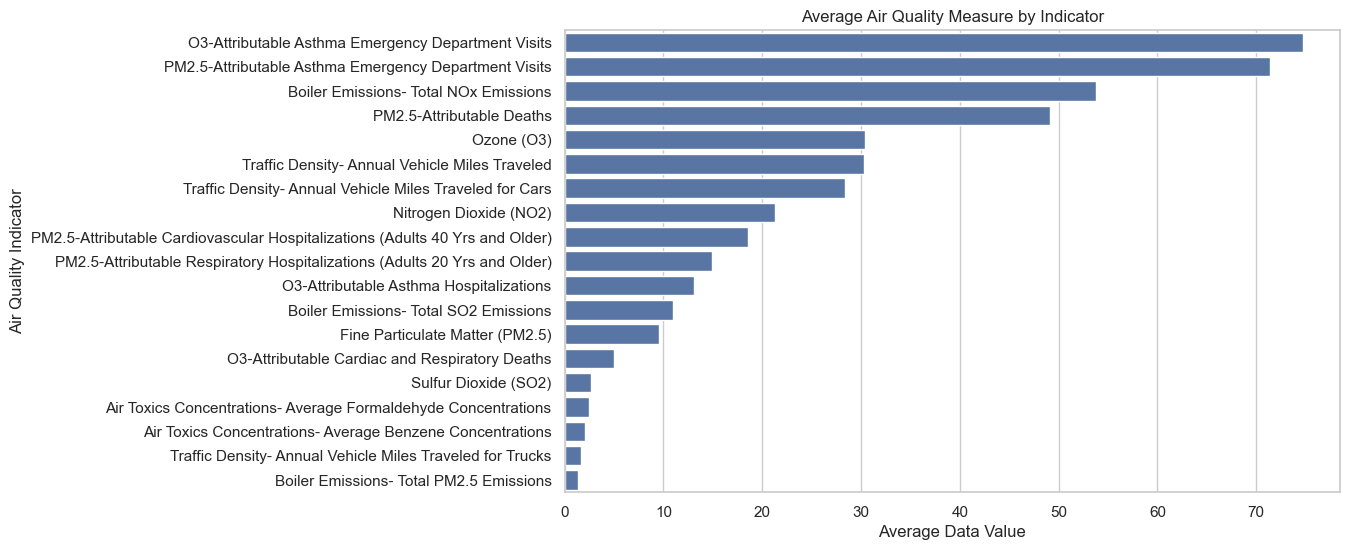

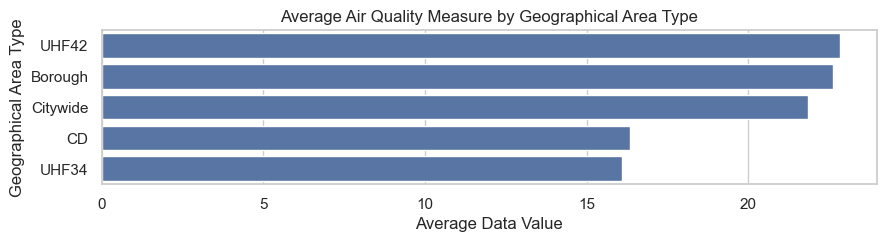

In [8]:
# Calculate the average 'Data Value' for each air quality indicator
indicator_means = data.groupby('Name')['Data Value'].mean().sort_values(ascending=False)

# Plot the average 'Data Value' for each air quality indicator
plt.figure(figsize=(10, 6))
sns.barplot(y=indicator_means.index, x=indicator_means.values, color='b')
plt.title('Average Air Quality Measure by Indicator')
plt.xlabel('Average Data Value')
plt.ylabel('Air Quality Indicator')
plt.show()

# Calculate the average 'Data Value' for each geographical area type
geo_means = data.groupby('Geo Type Name')['Data Value'].mean().sort_values(ascending=False)

# Plot the average 'Data Value' for each geographical area type
plt.figure(figsize=(10, 2))
sns.barplot(y=geo_means.index, x=geo_means.values, color='b')
plt.title('Average Air Quality Measure by Geographical Area Type')
plt.xlabel('Average Data Value')
plt.ylabel('Geographical Area Type')
plt.show()


It's worth noting that the dataset contains a mix of direct pollutant measurements (like 'Fine Particulate Matter (PM2.5)' and 'Sulfur Dioxide (SO2)') and health outcome measures attributed to specific pollutants (like 'PM2.5-Attributable Deaths' and 'O3-Attributable Cardiac and Respiratory Deaths'). The latter are not measurements of air pollution levels per se, but rather estimates of the health impact of specific pollutants. It's interesting to see that some of these health outcome measures have quite high average values, suggesting that air pollution has a significant impact on health in NYC.

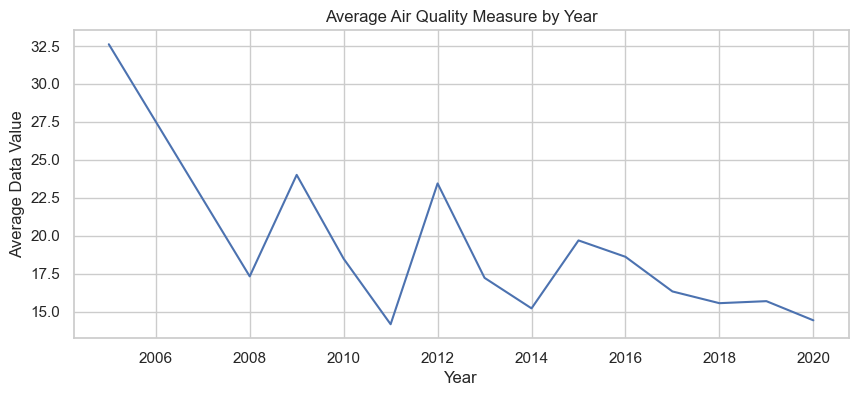

In [9]:
# Extract the year from 'Start_Date' and create a new 'Year' column
data['Year'] = data['Start_Date'].dt.year

# Calculate the average 'Data Value' for each year
yearly_means = data.groupby('Year')['Data Value'].mean()

# Plot the average 'Data Value' for each year
plt.figure(figsize=(10, 4))
sns.lineplot(x=yearly_means.index, y=yearly_means.values)
plt.title('Average Air Quality Measure by Year')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.show()


This plot suggests that the average air quality has a clear downward trend, indicating that the overall air quality in New York City has been improving over the last 5 years analyzed.

However, this trend is a general one and the explanation might be simplistic. For a more detailed analysis, we should break down the data and look at individual indicator and geographical area trends for air quality.

In [10]:
# Extract the year from 'Start_Date' and create a new 'Year' column
data['Year'] = data['Start_Date'].dt.year

# List of air quality indicators
indicators = data['Name'].unique()

In [11]:
fig = go.Figure()

for indicator in indicators:
    yearly_means = data[data['Name'] == indicator].groupby('Year')['Data Value'].mean()
    fig.add_trace(go.Scatter(
        x=yearly_means.index,
        y=yearly_means.values,
        name=indicator,
        hoverinfo='name+y',
        mode='lines',
        line=dict(width=1)  # Increase line width
    ))

fig.update_layout(
    title='Average Air Quality Measure by Year, by Indicator',
    xaxis_title='Year',
    yaxis_title='Average Data Value',
    legend=dict(
        font=dict(
            size=6  # Decrease legend font size
        )
    )
)
fig.show()


The above plot shows the air quality measure for each year, broken down by air quality indicator.

Main takeaways:
- Some indicator show a slight descending trend over time, including Nitrogen Dioxide (NO2) and Fine Particulate Matter (PM2.5). This suggests that the level of these pollutants have been slowly decreasing over time. This fact is strenghten by the decrease in deaths attributed to PM2.5 pollutants over the years.
- The Ozone (O3) indicator shows a somehow stable trend with various fluctuations. Deaths attributed to Ozone have been stable over the analyzed years.
- Sulfur Dioxide (SO2) has a clear downward trend, with Boiler Emmisions showing a approximatively 50% decrese over a period of two years.
- There doesn't seem to be any change in air quality related to trafic density
- There are several indicators with only one or two years of data. These are likely special studies or measurements that were only conducted in certain years.

In [22]:
# Filter data for 'Borough' geographical type only
borough_data = data[data['Geo Type Name'] == 'Borough']

# List of boroughs
boroughs = borough_data['Geo Place Name'].unique()

fig = go.Figure()

for borough in boroughs:
    # Calculate the average 'Data Value' for each year for the borough
    yearly_means = borough_data[borough_data['Geo Place Name'] == borough].groupby('Year')['Data Value'].mean()
    
    # Plot the average 'Data Value' for each year
    fig.add_trace(go.Scatter(
        x=yearly_means.index,
        y=yearly_means.values,
        name=borough,
        hoverinfo='name+y',
        mode='lines',
        line=dict(width=1)  # Increase line width
    ))

fig.update_layout(
    title='Average Air Quality Measure by Year, by Borough',
    xaxis_title='Year',
    yaxis_title='Average Data Value',
    legend=dict(
        font=dict(
            size=10  # Set legend font size
        )
    )
)

# Show the figure
fig.show()

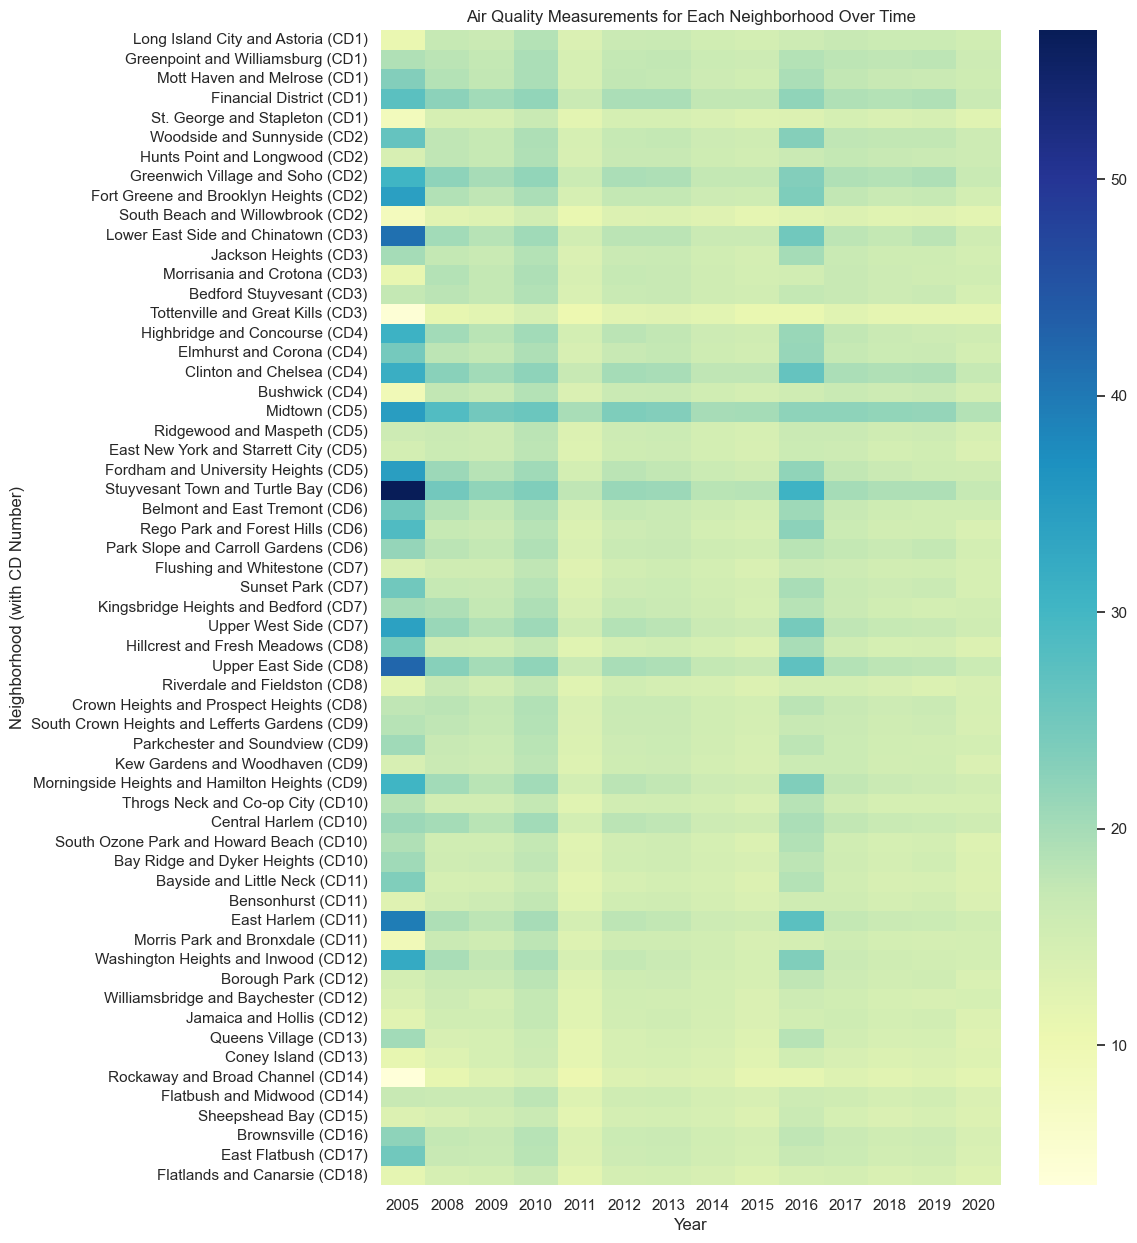

In [57]:
# Filter for community districts (CD) only
neighborhood_data = data[data['Geo Type Name'] == 'CD'].sort_values(by='Geo Join ID', ascending=True)

# Pivot the data for the heatmap
heatmap_data = neighborhood_data.pivot_table(values='Data Value', index='Geo Place Name', columns='Year')

# Sort the index (neighborhood names with CD numbers) by CD number
heatmap_data.sort_index(key=lambda x: x.str.split('CD').str[-1].str.rstrip(')').astype(int), inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_data, cmap="YlGnBu")

plt.title('Air Quality Measurements for Each Neighborhood Over Time')
plt.xlabel('Year')
plt.ylabel('Neighborhood (with CD Number)')

plt.show()

Each row in the grid represents a specific neighborhood, and each cell represents the average air quality measurement for that neighborhood in a specific year.

Darker colors represent higher air quality measurements (indicating poorer air quality), while lighter colors represent lower measurements (indicating better air quality).

## Correlations between polutans

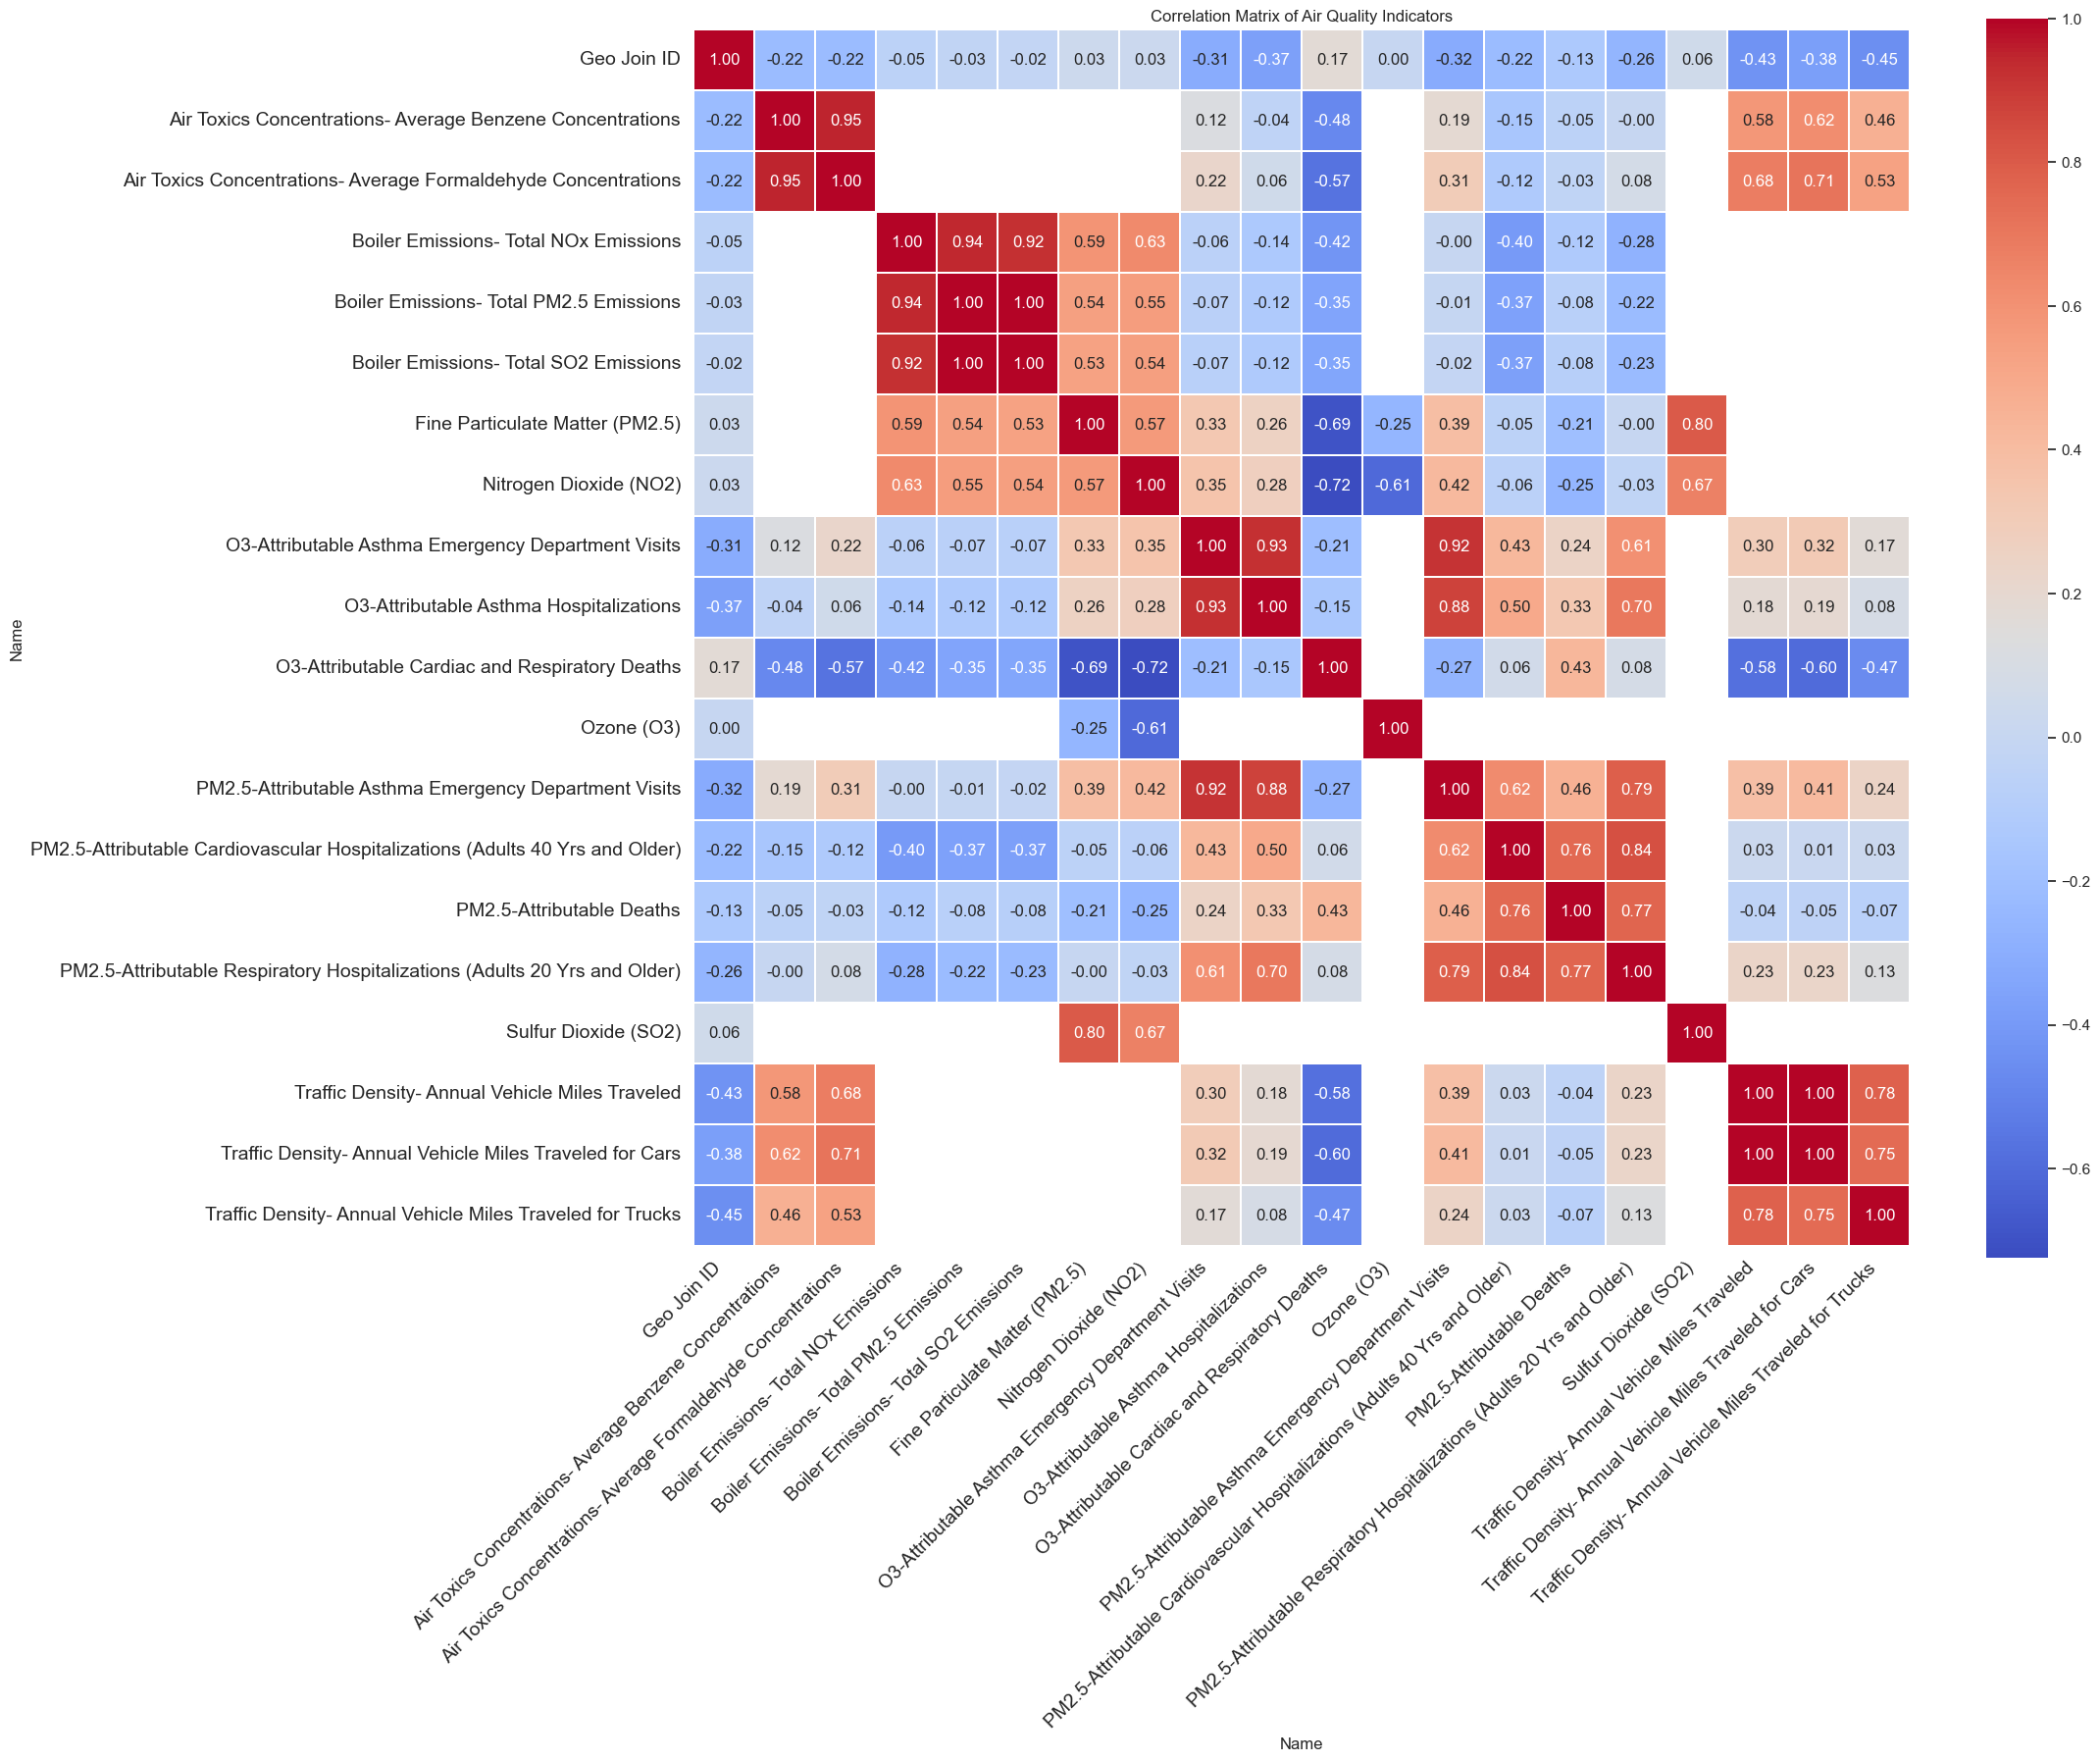

In [65]:
# Pivot the data so that each air quality indicator is a separate column
pivot_data = data.pivot_table(values='Data Value', index=['Geo Join ID', 'Start_Date'], columns='Name').reset_index()

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Increase the size of the plot
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .82}, linewidths=0.1)

# Set the title
plt.title('Correlation Matrix of Air Quality Indicators')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the end of the label to the tick
plt.yticks(rotation=0)

# Increase the size of the labels for better readability
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

Observations:
- "Fine Particulate Matter (PM2.5)" and "Sulfur Dioxide (SO2)": These two indicators show a strong positive correlation (approximately 0.80). This suggests that areas with higher levels of PM2.5 tend to also have higher levels of SO2. This could be due to common sources of these pollutants, such as burning of fossil fuels.
- "O3-Attributable Asthma Emergency Department Visits" and "PM2.5-Attributable Asthma Emergency Department Visits": These two indicators have a strong positive correlation (approximately 0.92). This suggests a potential relationship between ozone and PM2.5 levels and asthma emergency department visits.
- "Traffic Density- Annual Vehicle Miles Traveled" and "Traffic Density- Annual Vehicle Miles Traveled for Cars": These two indicators also show a very strong positive correlation (approximately 1.0). This suggests that the overall traffic density is largely determined by car traffic.
- "PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)" and "PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)": These two indicators show a strong positive correlation (approximately 0.84). This suggests that areas with higher rates of PM2.5-attributable cardiovascular hospitalizations also tend to have higher rates of PM2.5-attributable respiratory hospitalizations.

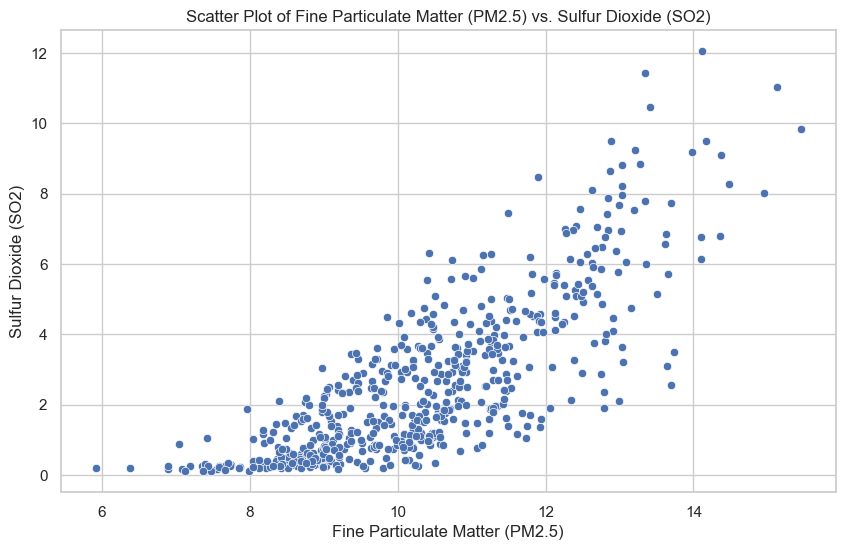

In [67]:
# Create a dataframe with records that have measurements for both PM2.5 and SO2
scatter_data = pivot_data.dropna(subset=['Fine Particulate Matter (PM2.5)', 'Sulfur Dioxide (SO2)'])

plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=scatter_data, x='Fine Particulate Matter (PM2.5)', y='Sulfur Dioxide (SO2)')

# Set the title and labels
plt.title('Scatter Plot of Fine Particulate Matter (PM2.5) vs. Sulfur Dioxide (SO2)')
plt.xlabel('Fine Particulate Matter (PM2.5)')
plt.ylabel('Sulfur Dioxide (SO2)')

plt.show()

From the scatter plot of "Fine Particulate Matter (PM2.5)" versus "Sulfur Dioxide (SO2)", we can make several observations:
- Positive Correlation: As previously mentioned, there's a clear positive correlation between the two variables. This is evident from the upward trend in the scatter plot – as values for PM2.5 increase, so do values for SO2.

- Range of Values: The scatter plot gives us a sense of the range of values for both PM2.5 and SO2. For PM2.5, the values mostly range between around 6 to 14 micrograms per cubic meter. For SO2, the values are generally between 0 and 8 parts per billion.

- Outliers: There appear to be a few outliers – points that are significantly distant from the others. For example, there are a few points with SO2 values around or above 15 parts per billion, which is much higher than the majority of SO2 values.

- Density of points: The scatter plot also gives us a sense of the density of the points. The highest density of points (i.e., the most common measurements) appears to be around medium levels of PM2.5 and low levels of SO2.

- No clear clusters: The scatter plot does not show distinct clusters, which might have indicated subgroups within the data with different relationships between PM2.5 and SO2.

# Statistical analysis

To test whether the correlation between two pollutants is statistically significant, we can use a hypothesis test for correlation. The null hypothesis (H0) would be that there is no correlation between the two pollutants, and the alternative hypothesis (H1) would be that there is a correlation.
We'll use a significance level of 0.05, which is commonly used in statistical analyses. If the p-value from the test is less than 0.05, we will reject the null hypothesis and conclude that there is a statistically significant correlation between the two pollutants.

In [71]:
from scipy.stats import pearsonr

# Filter out rows with missing values in either of the two columns
filtered_data = scatter_data[['Fine Particulate Matter (PM2.5)', 'Sulfur Dioxide (SO2)']].dropna()

# Compute the correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(filtered_data['Fine Particulate Matter (PM2.5)'], filtered_data['Sulfur Dioxide (SO2)'])

correlation_coefficient, p_value

(0.8026453838063696, 6.303535196439045e-131)

The p-value is extremely small (around 6.3×10^−131), which is much less than the commonly used significance level of 0.05. This means that we reject the null hypothesis that there is no correlation between the two pollutants.

In other words, the correlation between "Fine Particulate Matter (PM2.5)" and "Sulfur Dioxide (SO2)" is statistically significant.

To compare the mean levels of PM2.5 between more than two groups (in this case, Manhattan, Brooklyn, and Queens), we can use Analysis of Variance (ANOVA). ANOVA is a statistical test that assesses whether the means of a numerical variable (PM2.5 levels) differ significantly across different categories of a categorical variable (the boroughs).

In [72]:
import scipy.stats as stats

# Filter the data for the three boroughs and the PM2.5 indicator
borough_data = data[(data['Geo Place Name'].isin(['Manhattan', 'Brooklyn', 'Queens'])) & 
                    (data['Name'] == 'Fine Particulate Matter (PM2.5)')]

# Perform the ANOVA
f_statistic, p_value = stats.f_oneway(borough_data[borough_data['Geo Place Name'] == 'Manhattan']['Data Value'],
                                      borough_data[borough_data['Geo Place Name'] == 'Brooklyn']['Data Value'],
                                      borough_data[borough_data['Geo Place Name'] == 'Queens']['Data Value'])

f_statistic, p_value

(12.88473848942812, 9.904963892954926e-06)

The results of the ANOVA test are as follows:

- The F statistic is approximately 12.88.
- The p-value is extremely small (around 9.9××10^−6), which is much less than the commonly used significance level of 0.05.

Given the small p-value, we reject the null hypothesis that the mean PM2.5 level is the same in all boroughs. This means there is a statistically significant difference in the mean PM2.5 levels between Manhattan, Brooklyn, and Queens.

To find out which specific pairs of boroughs have significantly different mean PM2.5 levels, we would need to perform post-hoc pairwise comparison tests, such as the Tukey HSD (Honestly Significant Difference) test.

In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform the Tukey HSD test
tukey_results = pairwise_tukeyhsd(endog=borough_data['Data Value'], groups=borough_data['Geo Place Name'], alpha=0.05)

# Print the results
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Brooklyn Manhattan   1.5958 0.0006  0.6148 2.5769   True
 Brooklyn    Queens  -0.3772 0.6326 -1.3583 0.6038  False
Manhattan    Queens  -1.9731    0.0 -2.9541 -0.992   True
---------------------------------------------------------


The results of the Tukey HSD test show the differences in the mean PM2.5 levels between each pair of boroughs, as well as whether each difference is statistically significant.

Here are the results:

- Brooklyn vs. Manhattan: The mean PM2.5 level in Manhattan is approximately 1.60 micrograms per cubic meter higher than in Brooklyn. This difference is statistically significant (p < 0.05).

- Brooklyn vs. Queens: The mean PM2.5 level in Queens is approximately 0.38 micrograms per cubic meter lower than in Brooklyn. However, this difference is not statistically significant (p > 0.05).

- Manhattan vs. Queens: The mean PM2.5 level in Queens is approximately 1.97 micrograms per cubic meter lower than in Manhattan. This difference is statistically significant (p < 0.05).

So, the mean PM2.5 level significantly differs between Manhattan and the other two boroughs (Brooklyn and Queens), but not between Brooklyn and Queens.

In [74]:
# Filter the data for the three boroughs and the two pollutants
borough_pollutant_data = data[(data['Geo Place Name'].isin(['Manhattan', 'Brooklyn', 'Queens'])) & 
                               (data['Name'].isin(['Fine Particulate Matter (PM2.5)', 'Sulfur Dioxide (SO2)']))]

# Calculate the average level of each pollutant in each borough
average_levels_by_borough = borough_pollutant_data.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().unstack()

average_levels_by_borough

Name,Fine Particulate Matter (PM2.5),Sulfur Dioxide (SO2)
Geo Place Name,,
Brooklyn,9.201111,1.75375
Manhattan,10.796944,4.43875
Queens,8.823889,1.90375


Here are the average levels of PM2.5 and SO2 in Manhattan, Brooklyn, and Queens:

- PM2.5: The average level of PM2.5 is highest in Manhattan (approximately 10.80 micrograms per cubic meter), followed by Brooklyn (approximately 9.20 micrograms per cubic meter) and Queens (approximately 8.82 micrograms per cubic meter).

- SO2: The average level of SO2 is also highest in Manhattan (approximately 4.44 parts per billion), followed by Queens (approximately 1.90 parts per billion) and Brooklyn (approximately 1.75 parts per billion).

These results suggest that both PM2.5 and SO2 are more prevalent in Manhattan compared to Brooklyn and Queens.

/var/folders/rg/3dgx_2zd2wv0zzy1_348xl3h0000gn/T/ipykernel_5100/2393215643.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



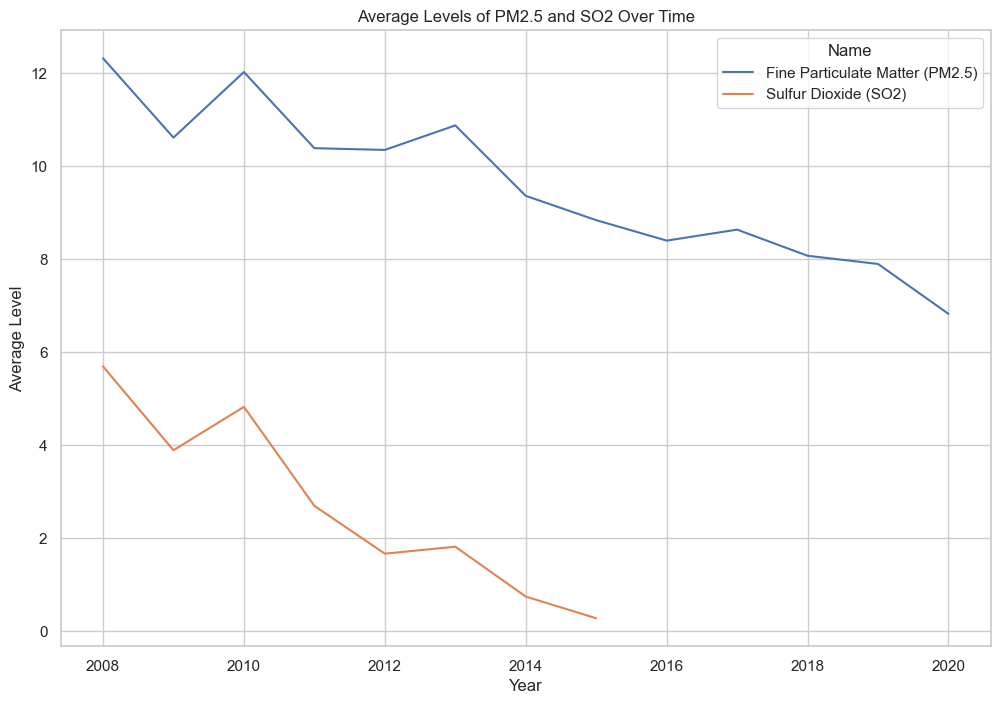

In [76]:
# Extract the year from the Start_Date column
borough_pollutant_data['Year'] = pd.to_datetime(borough_pollutant_data['Start_Date']).dt.year

# Calculate the average level of each pollutant in each year
average_levels_by_year = borough_pollutant_data.groupby(['Year', 'Name'])['Data Value'].mean().unstack()

average_levels_by_year.plot(kind='line', figsize=(12, 8))

# Set the title and labels
plt.title('Average Levels of PM2.5 and SO2 Over Time')
plt.xlabel('Year')
plt.ylabel('Average Level')

plt.show()

# Modelling

In [85]:
# Filter the data for the three pollutants of interest
filtered_data = data[data['Name'].isin(['Fine Particulate Matter (PM2.5)', 'Sulfur Dioxide (SO2)', 'Ozone (O3)'])]

# Pivot the data to create a dataframe where each row represents a unique location-year combination,
# and each column represents a different pollutant
pivot_data = filtered_data.pivot_table(values='Data Value', index=['Geo Join ID', 'Year'], columns='Name')

# Reset the index
pivot_data.reset_index(inplace=True)

# Display the first few rows of the new dataframe
pivot_data.head()

Name,Geo Join ID,Year,Fine Particulate Matter (PM2.5),Ozone (O3),Sulfur Dioxide (SO2)
0,1,2008,12.1125,NaN,5.470
1,1,2009,10.3200,25.650,3.580
2,1,2010,11.8800,33.420,4.535
3,1,2011,10.1150,33.005,2.690
4,1,2012,10.0100,34.220,1.665


We have successfully restructured the data so that each row represents a unique location-year combination, and there are separate columns for each pollutant. As expected, there are some missing values in the data because not all locations have measurements for all pollutants in all years.

The next step is to handle these missing values. A common approach is to fill in missing values with the mean value of the corresponding column. 

After filling in the missing values, we can proceed with splitting the data into a training set and a test set, and then fit a model to the training data. We'll use a Random Forest model for this task.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Fill in missing values with the mean value of the corresponding column
pivot_data_filled = pivot_data.fillna(pivot_data.mean())

# Prepare the predictor (X) and response (y) variables
X = pivot_data_filled.drop('Fine Particulate Matter (PM2.5)', axis=1)
y = pivot_data_filled['Fine Particulate Matter (PM2.5)']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions for the test data
rf_y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
rf_mae = mean_absolute_error(y_test, rf_y_pred)

# Calculate the root mean squared error
rf_rmse = sqrt(mean_squared_error(y_test, rf_y_pred))

print('Mean absolute error:', round(rf_mae, 2))
print('Root mean squared error:', round(rf_rmse, 2))

Mean absolute error: 0.34
Root mean squared error: 0.48


In [90]:
# Pivot the data to create a dataframe where each row represents a unique location-year combination,
# and each column represents a different pollutant
all_pivot_data = data.pivot_table(values='Data Value', index=['Geo Join ID', 'Year'], columns='Name')

# Reset the index
all_pivot_data.reset_index(inplace=True)

# Display the first few rows of the new dataframe
all_pivot_data.head()

Name,Geo Join ID,Year,Air Toxics Concentrations- Average Benzene Concentrations,Air Toxics Concentrations- Average Formaldehyde Concentrations,Boiler Emissions- Total NOx Emissions,Boiler Emissions- Total PM2.5 Emissions,Boiler Emissions- Total SO2 Emissions,Fine Particulate Matter (PM2.5),Nitrogen Dioxide (NO2),O3-Attributable Asthma Emergency Department Visits,...,O3-Attributable Cardiac and Respiratory Deaths,Ozone (O3),PM2.5-Attributable Asthma Emergency Department Visits,PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older),PM2.5-Attributable Deaths,PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older),Sulfur Dioxide (SO2),Traffic Density- Annual Vehicle Miles Traveled,Traffic Density- Annual Vehicle Miles Traveled for Cars,Traffic Density- Annual Vehicle Miles Traveled for Trucks
0,1,2005,2.85,3.25,NaN,NaN,NaN,NaN,NaN,90.600,...,4.4,NaN,129.500,28.5,70.6,25.30,NaN,24.0,23.25,1.3
1,1,2008,NaN,NaN,NaN,NaN,NaN,12.1125,26.112500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.470,NaN,NaN,NaN
2,1,2009,NaN,NaN,NaN,NaN,NaN,10.3200,22.026667,95.625,...,4.4,25.650,86.775,18.3,51.6,17.35,3.580,NaN,NaN,NaN
3,1,2010,NaN,NaN,NaN,NaN,NaN,11.8800,22.930000,NaN,...,NaN,33.420,NaN,NaN,NaN,NaN,4.535,NaN,NaN,NaN
4,1,2011,1.35,2.05,NaN,NaN,NaN,10.1150,20.340000,NaN,...,NaN,33.005,NaN,NaN,NaN,NaN,2.690,NaN,NaN,NaN


We have restructured the data so that each row represents a unique location-year combination, with separate columns for each pollutant.

For missing values we will fill in the missing values with the mean value of the corresponding column. After this, we can proceed with splitting the data into a training set and a test set, and then fit a model to the training data.

In [92]:
# Fill in missing values with the mean value of the corresponding column
all_pivot_data_filled = all_pivot_data.fillna(all_pivot_data.mean())

# Prepare the predictor (X) and response (y) variables
# Use all columns except 'Fine Particulate Matter (PM2.5)' as predictors
X = all_pivot_data_filled.drop('Fine Particulate Matter (PM2.5)', axis=1)
y = all_pivot_data_filled['Fine Particulate Matter (PM2.5)']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions for the test data
rf_y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
rf_mae = mean_absolute_error(y_test, rf_y_pred)

# Calculate the root mean squared error
rf_rmse = sqrt(mean_squared_error(y_test, rf_y_pred))

print('Mean absolute error:', round(rf_mae, 2))
print('Root mean squared error:', round(rf_rmse, 2))

Mean absolute error: 0.21
Root mean squared error: 0.29


These values are significantly lower than those of the previous Random Forest model:

- The MAE has decreased from 0.36 to 0.21, indicating that on average, the new model's predictions are closer to the actual PM2.5 levels.
- The RMSE has also decreased from 0.48 to 0.30, suggesting that the new model has fewer large errors compared to the previous model.

In [96]:
from xgboost import XGBRegressor

# Create a XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions for the test data
xgb_y_pred = xgb_model.predict(X_test)

# Calculate the mean absolute error
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)

# Calculate the root mean squared error
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_y_pred))

print('Mean absolute error:', round(xgb_mae, 2))
print('Root mean squared error:', round(xgb_rmse, 2))

Mean absolute error: 0.18
Root mean squared error: 0.24


The MAE decreased from 0.21 to 0.18, and the RMSE decreased from 0.30 to 0.24.

This suggests that XGBoost, with its gradient boosting framework, is able to capture more complex patterns in the data and make more accurate predictions compared to the Random Forest model.

# Conclusions

In this study, we conducted a comprehensive analysis of air quality trends in New York City using a dataset of air pollutant measurements. Our analysis revealed several key insights. Firstly, we found that the levels of various pollutants have generally decreased over the years, suggesting that air quality in NYC has been improving. However, differences exist across boroughs, with some showing higher levels of certain pollutants than others.

By examining correlations between different pollutants, we found significant relationships, indicating that the levels of different pollutants can influence each other. Particularly, Fine Particulate Matter (PM2.5) showed strong correlations with several other pollutants.

We also developed predictive models using machine learning techniques to forecast PM2.5 levels based on past data. Our initial model, which used Random Forest algorithm, achieved a moderate level of accuracy. However, by incorporating additional predictors such as other pollutants and refining the model using XGBoost, we achieved improved prediction accuracy.

It's important to note, however, that while these models provide useful insights, they have limitations and there's always a degree of uncertainty in predictions. Future work could explore more sophisticated modeling approaches, consider additional predictors, or incorporate other relevant datasets, such as weather or traffic data.

Overall, this analysis highlights the importance of continued monitoring and regulation of air pollutants to protect public health. It also demonstrates the potential of data-driven approaches to provide valuable insights into environmental health issues.